In [1]:
import tensorflow as tf
import cv2

from tensorflow.keras import datasets, layers, models


In [2]:
# 이미지 

In [3]:
f = open("images/sino0.txt", 'r')
line0 = f.read()
print(line0)
f.close

FileNotFoundError: [Errno 2] No such file or directory: 'images/sino0.txt'

In [ ]:
import numpy as np
metal0_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line0):
    if j == '\t':
        metal0_img[k,l] = float(line0[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [ ]:
metal0_img.shape

In [ ]:
import numpy as np

ori_img = metal0_img
line = np.zeros((256,360))
test_img = metal0_img
for j in range(360-2):
    for i in range(256-2):
        if (ori_img[i, j] < ori_img[i+1, j]) & (ori_img[i+1, j] > ori_img[i+2, j]):
            line[i,j] = 1
            test_img[i,j] = 0
plt.imshow(test_img)
plt.colorbar

In [ ]:
img = cv2.imread('images/metal0_img.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

In [4]:
cv2.imshow('ori', img)
cv2.imshow('ori_contours', thresh)
cv2.waitKey(0)

NameError: name 'img' is not defined

In [8]:
img = cv2.imread('images/metal0_img.jpg', cv2.IMREAD_COLOR)
warped = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
warped = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

In [9]:
cv2.imshow("ori", img)
cv2.imshow('ori_Scanned', warped)
cv2.waitKey(0)

-1

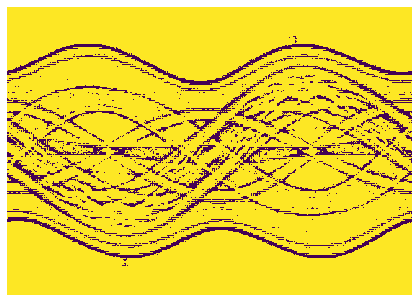

In [10]:
plt.imshow(warped)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/warped.jpg', bbox_inches = 'tight', pad_inches=0, dpi=100)

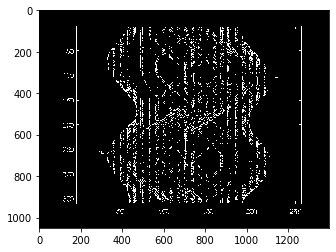

In [11]:
image_gray = cv2.imread('images/data_ori.png', cv2.IMREAD_GRAYSCALE)
# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (0.05 - 0.00033) * median_intensity))
upper_threshold = int(min(255, (0.05 + 0.00033) * median_intensity))
# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()

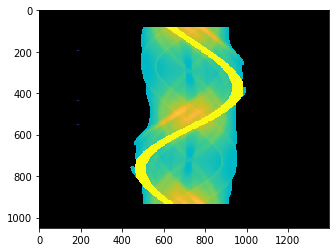

In [12]:
image_bgr = cv2.imread('images/data1.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 1000, 1200)
# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

In [13]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [14]:
import numpy as np
metal3_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

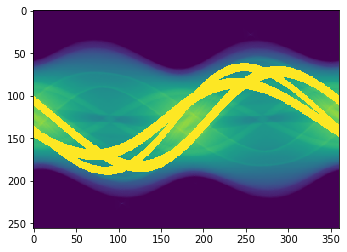

In [15]:
plt.imshow(metal3_img)
plt.colorbar

In [16]:
metal3_img.shape

(256, 360)

In [17]:
result_img = metal0_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        k = k+1
train_data = np.empty((k,window_size,window_size,1))
result_data = np.empty((k,1))

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         8320      
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [19]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [ ]:
k = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=100)

(16830, 3, 3, 1)
(16830, 1)
Epoch 1/100
526/526 [==============================] - 1s 2ms/step - loss: 5.3189 - accuracy: 0.0179
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 4.9931 - accuracy: 0.0199
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 4.9664 - accuracy: 0.0182
Epoch 4/100
526/526 [==============================] - ETA: 0s - loss: 4.9251 - accuracy: 0.02 - 1s 2ms/step - loss: 4.9239 - accuracy: 0.0204
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 4.5987 - accuracy: 0.0250
Epoch 6/100
526/526 [==============================] - 1s 2ms/step - loss: 4.0031 - accuracy: 0.0387
Epoch 7/100
526/526 [==============================] - 1s 2ms/step - loss: 3.7252 - accuracy: 0.0477
Epoch 8/100
526/526 [==============================] - 1s 2ms/step - loss: 3.5355 - accuracy: 0.0630
Epoch 9/100
526/526 [==============================] - 1s 2ms/step - loss: 3.4330 - accuracy: 0.0664
Epoch 10/100
526/526 

In [ ]:
test_img = metal3_img

In [ ]:
for i in range(256-window_size):
    for j in range(120-window_size):
        if 300 in test_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if test_img[i+window_size,j] == 300:
                test_data = np.empty((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = test_img[i+w,j+v]
                prediction = model.predict(test_data)
                test_img[i+window_size,j] = np.argmax(prediction)

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(test_img[:,0:120])
plt.colorbar

In [ ]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)